### UFO Predictions
#### Angel, Filis

#### 1. First, import the following libraries

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

#### 2. Connect to the database called ufo.db which was made from a csv file which was made from scraping the site:  http://www.nuforc.org/index.html

In [2]:
conn = sqlite3.connect('ufos.db')

In [3]:
c = conn.cursor()

#### 3. Grab all the data from the database ufo and save it as a dataframe table. 

In [4]:
c.execute('''select * from populations''')
population_df = pd.DataFrame(c.fetchall())
population_df.columns = [i[0] for i in c.description]

In [5]:
population_df.head()

,Geographic Area,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,AL,"4,785,448","4,798,834","4,815,564","4,830,460","4,842,481","4,853,160","4,864,745","4,875,120","4,887,871"
1,AK,"713,906","722,038","730,399","737,045","736,307","737,547","741,504","739,786","737,438"
2,AZ,"6,407,774","6,473,497","6,556,629","6,634,999","6,733,840","6,833,596","6,945,452","7,048,876","7,171,646"
3,AR,"2,921,978","2,940,407","2,952,109","2,959,549","2,967,726","2,978,407","2,990,410","3,002,997","3,013,825"
4,CA,"37,320,903","37,641,823","37,960,782","38,280,824","38,625,139","38,953,142","39,209,127","39,399,349","39,557,045"


In [6]:

column_names = population_df.columns

for column_name in column_names:
    population_df[column_name]=population_df[column_name].apply(lambda x: x.replace(',',''))
population_df.head()


,Geographic Area,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,AL,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871
1,AK,713906,722038,730399,737045,736307,737547,741504,739786,737438
2,AZ,6407774,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646
3,AR,2921978,2940407,2952109,2959549,2967726,2978407,2990410,3002997,3013825
4,CA,37320903,37641823,37960782,38280824,38625139,38953142,39209127,39399349,39557045


In [7]:
for column_name in column_names[1:]:
    population_df[column_name] = population_df[column_name].astype(int)
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 10 columns):
Geographic Area    51 non-null object
2010               51 non-null int64
2011               51 non-null int64
2012               51 non-null int64
2013               51 non-null int64
2014               51 non-null int64
2015               51 non-null int64
2016               51 non-null int64
2017               51 non-null int64
2018               51 non-null int64
dtypes: int64(9), object(1)
memory usage: 4.1+ KB


In [8]:
c.execute('''select * from ufos''')
ufo_df = pd.DataFrame(c.fetchall())
ufo_df.columns = [i[0] for i in c.description]
ufo_df.head()

,City,State,Shape,Duration,Summary,Date_Posted,Duration_sec,event_date
0,Cincinnati,OH,triangle,15 seconds,Large V/triangle-shaped craft that moved silen...,5/9/19,15.0,2019-05-09 21:15:00
1,Statesboro,GA,triangle,20 seconds,"Two UFO's near Statesboro, Ga. 11:00 PM 5-9-2019.",5/9/19,20.0,2019-05-08 23:00:00
2,Norfolk,VA,light,>10 minutes,"Extremely loud bang, light spotted in sky.",5/9/19,600.0,2019-05-08 23:00:00
3,Saint George,UT,other,1:30,Started noticing a huge flash of light @ aroun...,5/9/19,90.0,2019-05-08 01:30:00
4,Highlands,NC,light,1 minute,I have about 10 recordings from last night on ...,5/9/19,60.0,2019-05-08 01:00:00


In [9]:
ufo_df.head()

,City,State,Shape,Duration,Summary,Date_Posted,Duration_sec,event_date
0,Cincinnati,OH,triangle,15 seconds,Large V/triangle-shaped craft that moved silen...,5/9/19,15.0,2019-05-09 21:15:00
1,Statesboro,GA,triangle,20 seconds,"Two UFO's near Statesboro, Ga. 11:00 PM 5-9-2019.",5/9/19,20.0,2019-05-08 23:00:00
2,Norfolk,VA,light,>10 minutes,"Extremely loud bang, light spotted in sky.",5/9/19,600.0,2019-05-08 23:00:00
3,Saint George,UT,other,1:30,Started noticing a huge flash of light @ aroun...,5/9/19,90.0,2019-05-08 01:30:00
4,Highlands,NC,light,1 minute,I have about 10 recordings from last night on ...,5/9/19,60.0,2019-05-08 01:00:00


#### 4. Display the data from the database as a dataframe.

In [10]:
ufo_df.Duration_sec=ufo_df.Duration_sec.astype(float)

#### 5. Data Exploration and Cleaning.

In [11]:
c.execute('''select * from ufos where state in ('DC','VA', 'MD') ''')
ufo_df_dc_metro = pd.DataFrame(c.fetchall())
ufo_df_dc_metro.columns = [i[0] for i in c.description]

In [15]:
ufo_df_dc_metro.head()

,City,State,Shape,Duration,Summary,Date_Posted,Duration_sec,event_date
0,Norfolk,VA,light,>10 minutes,"Extremely loud bang, light spotted in sky.",5/9/19,600.0,2019-05-08 23:00:00
1,Staunton,VA,chevron,10 minutes,"On 5/6/19 in Staunton, VA saw an inverted V sh...",5/9/19,600.0,2019-05-06 22:37:00
2,Hebron,MD,oval,15 minutes,"5 crafts- Hebron, Maryland at 9:30 pm on April...",5/9/19,900.0,2019-04-27 21:30:00
3,Harrisonburg,VA,triangle,0.5 second,"Triangle, white centerish area with rainbow em...",4/25/19,0.5,2019-04-24 22:45:00
4,Chesapeake,VA,circle,2 minutes,Was walking to the happy shopper down the stre...,4/25/19,120.0,2019-04-23 14:58:00


In [16]:
c.execute('''select * from ufos where state= 'CA' ''')
ufo_df_ca = pd.DataFrame(c.fetchall())
ufo_df_ca.columns = [i[0] for i in c.description]

In [17]:
ufo_df.Duration_sec.isna().sum()

0

/Users/angelmanzur/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


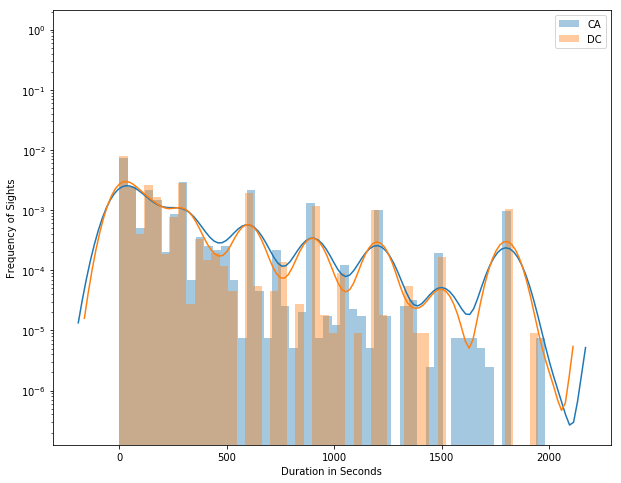

In [18]:
ufo_df_ca.Duration_sec=ufo_df_ca.Duration_sec.astype(float)
ufo_df_dc_metro.Duration_sec=ufo_df_dc_metro.Duration_sec.astype(float)
fig = plt.figure(figsize=(10,8))
sns.distplot(ufo_df_ca[ufo_df_ca.Duration_sec<2000]['Duration_sec'], bins=50, label='CA')
sns.distplot(ufo_df_dc_metro[ufo_df_dc_metro.Duration_sec<2000]['Duration_sec'], bins=50, label='DC')
plt.semilogy(True)
plt.ylabel('Frequency of Sights')
plt.xlabel('Duration in Seconds')
plt.legend()
# plt.xlim(0,20000)

In [ ]:
ttest_ind(ufo_df_ca[ufo_df_ca.Duration_sec<2000]['Duration_sec'],
          ufo_df_dc_metro[ufo_df_dc_metro.Duration_sec<2000]['Duration_sec'] ,
          equal_var=False)


In [ ]:
# The p-value is less than 0.05 so we reject the null hypothesis and there is a
# difference between the duration of sightings in CA vs DC. 

In [ ]:
len(ufo_df_ca.Duration_sec<2000)

In [ ]:
len(ufo_df_dc.Duration_sec<2000)

In [ ]:
# ufo_df

In [ ]:
ufo_df.Duration_sec=ufo_df.Duration_sec.astype(float)
fig = plt.figure(figsize=(10,8))
sns.distplot(ufo_df[(ufo_df.Shape=='light')&(ufo_df.Duration_sec<2000)]['Duration_sec'], bins=50, label='CA')
sns.distplot(ufo_df[(ufo_df.Shape=='circle')&(ufo_df.Duration_sec<2000)]['Duration_sec'], bins=50, label='DC')
plt.semilogy(True)
plt.ylabel('Frequency of Sights')
plt.xlabel('Duration in Seconds')
plt.legend()

In [ ]:
ttest_ind(ufo_df[(ufo_df.Shape=='light')&(ufo_df.Duration_sec<2000)]['Duration_sec'],
          ufo_df[(ufo_df.Shape=='circle')&(ufo_df.Duration_sec<2000)]['Duration_sec'] ,
          equal_var=False)

In [ ]:
ttest_ind(ufo_df[(ufo_df.Shape=='light')&(ufo_df.Duration_sec<100)]['Duration_sec'],
          ufo_df[(ufo_df.Shape=='circle')&(ufo_df.Duration_sec<100)]['Duration_sec'] ,
          equal_var=False)

In [ ]:
ttest_ind(ufo_df[(ufo_df.Shape=='light')]['Duration_sec'],
          ufo_df[(ufo_df.Shape=='circle')]['Duration_sec'] ,
          equal_var=False)

In [ ]:
ttest_ind(ufo_df[(ufo_df.Shape=='light')&(ufo_df.Duration_sec<2000)]['Duration_sec'],
          ufo_df[(ufo_df.Shape=='sphere')&(ufo_df.Duration_sec<2000)]['Duration_sec'] ,
          equal_var=False)

In [ ]:
ufo_df.Duration_sec=ufo_df.Duration_sec.astype(float)
fig = plt.figure(figsize=(10,8))
sns.distplot(ufo_df[(ufo_df.Shape=='sphere')&(ufo_df.Duration_sec<500)]['Duration_sec'], bins=50, label='CA')
sns.distplot(ufo_df[(ufo_df.Shape=='chevron')&(ufo_df.Duration_sec<500)]['Duration_sec'], bins=50, label='DC')
plt.semilogy(True)
plt.ylabel('Frequency of Sights')
plt.xlabel('Duration in Seconds')
plt.legend()

In [ ]:
ttest_ind(ufo_df[(ufo_df.Shape=='chevron')&(ufo_df.Duration_sec<500)]['Duration_sec'],
          ufo_df[(ufo_df.Shape=='sphere')&(ufo_df.Duration_sec<500)]['Duration_sec'] ,
          equal_var=False)

In [ ]:
ufo_df.Shape.value_counts()

### Plan

We have two questions already. 

Next Steps: 
1. Fix 15_20 duration and military time. 
2. Find Census data for population for CA and DC metro area for specific years. (3rd question)
3. Create db of the census data. 
4. How do the ufo shapes compare between 1960s vs 2000s? Does a certain shape last longer in 1960s vs now? 
5. Is there a difference between the number of sightings per population for a specific region for specific year/decade? 

For DC metro and CA:

First Question: How does CA vs DC metro area differ in terms of number of durations? - bootstrap & ttest

1. From CA distribution, we pick 500 numbers randomly from those numbers we record the mean and the standard deviation. Repeat 1000 times. 

2. Plot a distribution plot of the means found in 1. This should look like a normal distribution. 

3. Repeat the same process for DC metro. 

4. Apply the t-test on the two new distributions. 

Second Question: How different are the durations between shapes? - (boot strap + ttest)

5. Choose two shapes and do 1-4 on those. This is the second question. 

6. Use CA group by year and count the number of events. 

Third Question: Number of sights per capital 




Bootstrap for states

In [19]:
ca_means = []
for i in range(1000):
    x_ca = np.random.choice(ufo_df_ca['Duration_sec'],size=500)
    ca_means.append(x_ca.mean())

In [20]:
dc_means = []
for i in range(1000):
    x_dc = np.random.choice(ufo_df_dc_metro['Duration_sec'],size=500)
    dc_means.append(x_dc.mean())

In [21]:
# ca_means

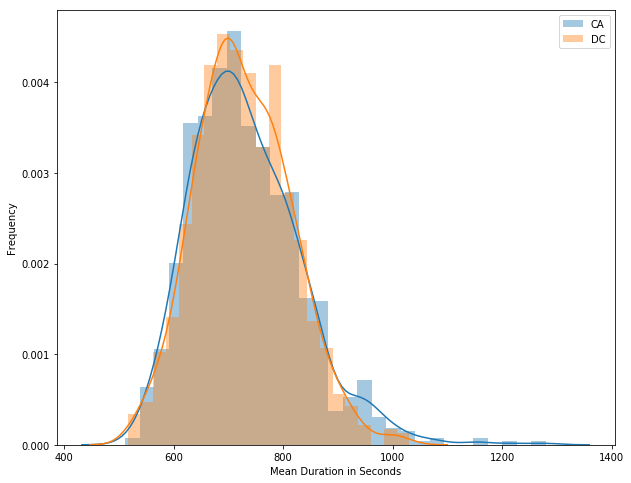

In [22]:
fig = plt.figure(figsize=(10,8))
sns.distplot(ca_means, label='CA')
sns.distplot(dc_means, label='DC')
plt.ylabel('Frequency')
plt.xlabel('Mean Duration in Seconds')
plt.legend()

In [23]:
ttest_ind(ca_means,
          dc_means ,
          equal_var=False)

Ttest_indResult(statistic=1.22582965567541, pvalue=0.22041056678682713)

The duration between east and west coast is the same, we do not reject the null hypothesis which was they are the same. 

In [24]:
np.array(ca_means).std()

100.83278694887515

In [25]:
np.array(dc_means).std()

86.55040142761601

Checking out the shapes

In [26]:
circle_means = []
for i in range(1000):
    x_circle = np.random.choice(ufo_df[ufo_df.Shape=='circle']['Duration_sec'],size=500)
    circle_means.append(x_circle.mean())

In [27]:
triangle_means = []
for i in range(1000):
    x_triangle = np.random.choice(ufo_df[ufo_df.Shape=='triangle']['Duration_sec'],size=500)
    triangle_means.append(x_triangle.mean())

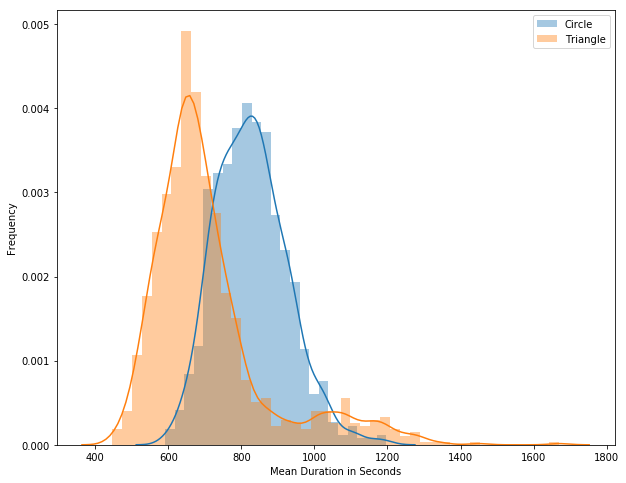

In [28]:
fig = plt.figure(figsize=(10,8))
sns.distplot(circle_means, label='Circle')
sns.distplot(triangle_means, label='Triangle')
plt.ylabel('Frequency')
plt.xlabel('Mean Duration in Seconds')
plt.legend()

In [29]:
ttest_ind(circle_means,
          triangle_means ,
          equal_var=False)

Ttest_indResult(statistic=19.241970982342533, pvalue=1.4461998521195513e-74)

The null hypothesis was that people see them the same amount of time, but in this case people see circles longer. 

### Joining with population_df etc. 

In [30]:
c.execute('''select state, count(shape) as Counts from ufos group by state''')
ufo_df_groupstate = pd.DataFrame(c.fetchall())
ufo_df_groupstate.columns = [i[0] for i in c.description]
ufo_df_groupstate.head()

,State,Counts
0,AB,425
1,AK,456
2,AL,853
3,AR,730
4,AZ,3213


In [31]:
c.execute('''select state, counts as '2010' from 
            (select state, count(shape) as counts, strftime('%Y',event_date) as year from ufos 
            group by strftime('%Y',event_date), state)
            where year = '2010'
            ''')
ufo_df_groupstate = pd.DataFrame(c.fetchall())
ufo_df_groupstate.columns = [i[0] for i in c.description]
ufo_df_groupstate.head()

,state,2010
0,AB,19
1,AK,11
2,AL,20
3,AR,37
4,AZ,94


In [118]:
year_list = range(2010, 2019)
cmd = """SELECT state """
for year in year_list:
    cmd += """, \n sum(CAST ("y{0}" AS int)) as N{0}""".format(year)
cmd += """\n FROM \n \t(SELECT state """
for year in year_list:
    cmd += """, \n \t COUNT( CASE WHEN strftime('%Y', event_date) = '{0}' THEN shape END) AS 'y{0}'""".format(year)
cmd += """, \n \t strftime('%Y', event_date) as year FROM ufos """
cmd += """\n \t GROUP BY strftime('%Y',event_date), state)"""
cmd += """\n GROUP BY state"""
print(cmd)

SELECT state , 
 sum(CAST ("y2010" AS int)) as N2010, 
 sum(CAST ("y2011" AS int)) as N2011, 
 sum(CAST ("y2012" AS int)) as N2012, 
 sum(CAST ("y2013" AS int)) as N2013, 
 sum(CAST ("y2014" AS int)) as N2014, 
 sum(CAST ("y2015" AS int)) as N2015, 
 sum(CAST ("y2016" AS int)) as N2016, 
 sum(CAST ("y2017" AS int)) as N2017, 
 sum(CAST ("y2018" AS int)) as N2018
 FROM 
 	(SELECT state , 
 	 COUNT( CASE WHEN strftime('%Y', event_date) = '2010' THEN shape END) AS 'y2010', 
 	 COUNT( CASE WHEN strftime('%Y', event_date) = '2011' THEN shape END) AS 'y2011', 
 	 COUNT( CASE WHEN strftime('%Y', event_date) = '2012' THEN shape END) AS 'y2012', 
 	 COUNT( CASE WHEN strftime('%Y', event_date) = '2013' THEN shape END) AS 'y2013', 
 	 COUNT( CASE WHEN strftime('%Y', event_date) = '2014' THEN shape END) AS 'y2014', 
 	 COUNT( CASE WHEN strftime('%Y', event_date) = '2015' THEN shape END) AS 'y2015', 
 	 COUNT( CASE WHEN strftime('%Y', event_date) = '2016' THEN shape END) AS 'y2016', 
 	 COUNT( CASE

In [126]:
c.execute(cmd)
ufo_df_groupstate = pd.DataFrame(c.fetchall())
ufo_df_groupstate.columns = [i[0] for i in c.description]
ufo_df_groupstate.head() #[(ufo_df_groupstate.state=='AB')]

,state,N2010,N2011,N2012,N2013,N2014,N2015,N2016,N2017,N2018
0,AB,19,11,17,20,38,33,25,38,13
1,AK,11,14,40,47,39,32,36,20,20
2,AL,20,29,50,70,111,58,44,55,24
3,AR,37,35,46,50,25,37,31,36,32
4,AZ,94,127,168,211,265,247,213,190,74


In [128]:
population_df.head()

,Geographic Area,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,AL,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871
1,AK,713906,722038,730399,737045,736307,737547,741504,739786,737438
2,AZ,6407774,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646
3,AR,2921978,2940407,2952109,2959549,2967726,2978407,2990410,3002997,3013825
4,CA,37320903,37641823,37960782,38280824,38625139,38953142,39209127,39399349,39557045


In [132]:
ufo_pop_df  = pd.merge(population_df, ufo_df_groupstate,
                  left_on='Geographic Area',
                  right_on='state', 
                  how='left')

In [134]:
ufo_pop_df.drop(['Geographic Area'], axis=1)
ufo_pop_df.head()

,Geographic Area,2010,2011,2012,2013,2014,2015,2016,2017,2018,state,N2010,N2011,N2012,N2013,N2014,N2015,N2016,N2017,N2018
0,AL,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871,AL,20,29,50,70,111,58,44,55,24
1,AK,713906,722038,730399,737045,736307,737547,741504,739786,737438,AK,11,14,40,47,39,32,36,20,20
2,AZ,6407774,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646,AZ,94,127,168,211,265,247,213,190,74
3,AR,2921978,2940407,2952109,2959549,2967726,2978407,2990410,3002997,3013825,AR,37,35,46,50,25,37,31,36,32
4,CA,37320903,37641823,37960782,38280824,38625139,38953142,39209127,39399349,39557045,CA,481,498,640,653,780,725,516,516,270


In [143]:
for year in year_list:
    new_col = 'NperMil{0}'.format(year)
    ufo_col = 'N{0}'.format(year)
    pop_col = '{0}'.format(year)
    
    ufo_pop_df[new_col] = ufo_pop_df[ufo_col]/(ufo_pop_df[pop_col]/1e6)

In [144]:
ufo_pop_df

,Geographic Area,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,Npercap2010,NperMil2010,NperMil2011,NperMil2012,NperMil2013,NperMil2014,NperMil2015,NperMil2016,NperMil2017,NperMil2018
0,AL,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871,...,4.179337,4.179337,6.043135,10.383000,14.491373,22.922134,11.950976,9.044667,11.281774,4.910113
1,AK,713906,722038,730399,737045,736307,737547,741504,739786,737438,...,15.408191,15.408191,19.389561,54.764588,63.768155,52.967037,43.387066,48.549974,27.034845,27.120924
2,AZ,6407774,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646,...,14.669681,14.669681,19.618454,25.622923,31.801060,39.353474,36.144952,30.667551,26.954652,10.318412
3,AR,2921978,2940407,2952109,2959549,2967726,2978407,2990410,3002997,3013825,...,12.662655,12.662655,11.903114,15.582080,16.894466,8.423958,12.422748,10.366471,11.988024,10.617737
4,CA,37320903,37641823,37960782,38280824,38625139,38953142,39209127,39399349,39557045,...,12.888220,12.888220,13.229965,16.859505,17.058149,20.194102,18.612106,13.160201,13.096663,6.825586
5,CO,5048281,5121771,5193721,5270482,5351218,5452107,5540921,5615902,5695564,...,11.092885,11.092885,18.548272,19.061478,25.424620,33.076582,25.494731,32.666050,24.216947,15.450621
6,CT,3579125,3588023,3594395,3594915,3594783,3587509,3578674,3573880,3572665,...,15.087486,15.087486,17.001006,38.949531,34.493166,23.923558,20.348381,18.163152,21.265403,17.074089
7,DE,899595,907316,915188,923638,932596,941413,949216,957078,967171,...,8.892891,8.892891,9.919367,29.502135,12.992103,37.529648,29.742525,13.695513,20.896938,8.271547
8,DC,605085,619602,634725,650431,662513,675254,686575,695691,702455,...,11.568623,11.568623,9.683636,14.179369,1.537442,9.056426,4.442773,4.369515,1.437420,2.847157
9,FL,18845785,19093352,19326230,19563166,19860330,20224249,20629982,20976812,21299325,...,9.338958,9.338958,13.669679,19.921112,24.944838,29.153594,20.421030,15.123620,14.349178,8.591822
